# Supervised Learning - Linear Regression

### In this linear regression excercise we are going to predict the percentage of an student based on the no. of study hours. This is a simple linear regression excercise as it involves just 2 variables.

## Done By : Giridharan S

### Importing necessary Libraries and dataset

Following libraries are needed for this task in initial stage. Few more libraries will be used in further part of this task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We are going to import and store the dataset from an url mentioned below.

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Understanding the dataset

To understand the dataset, we are going to plot a scatter plot using matplotlib library.

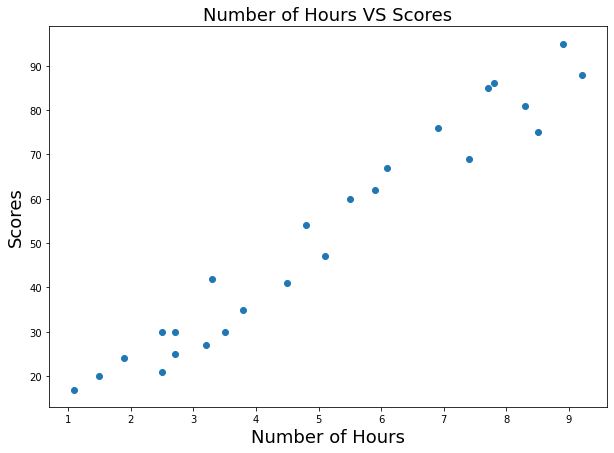

In [64]:
plt.figure(figsize=(10,7))
plt.scatter(df.Hours,df.Scores)
plt.title('Number of Hours VS Scores',fontsize=18)
plt.xlabel('Number of Hours',fontsize=18)
plt.ylabel('Scores',fontsize=18)
plt.show()

The above graph indicates that the samples of the dataset has a <b>positive trend</b> which is suitable for linear regression

### Preparing the data

Preparing X and Y variables
x = independent variable /
y = dependent variable

In [5]:
x=df.drop('Scores',axis=1)
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [6]:
y=df[['Scores']]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


Splitting the dataset as train and test set using train_test_split. Train set is used to train the model and test set is used to evaluate the performance of the model.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Model Creation

Creating a linear regression model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Training the model using the train set.

In [10]:
model.fit(x_train,y_train)

LinearRegression()

Evaluating the model using test set and to see the accuracy of the model.

In [13]:
model.score(x_test,y_test)

0.9454906892105356

To find the coefficient and intercept of the linear regression line.

In [14]:
model.coef_ , model.intercept_

(array([[9.91065648]]), array([2.01816004]))

To plot the graph with prediction line.

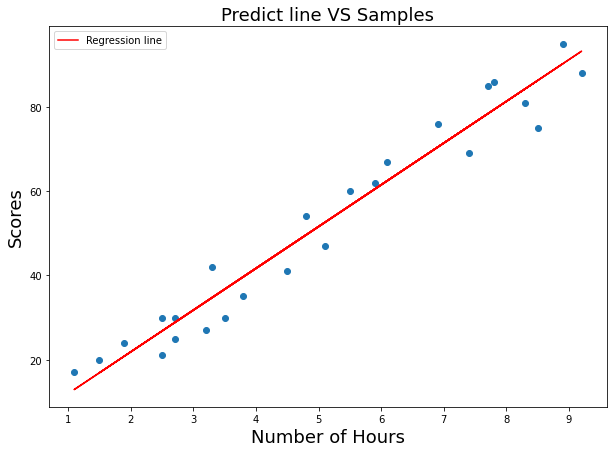

In [21]:
line = model.coef_*x + model.intercept_     #line = m*x + c
plt.figure(figsize=(10,7))
plt.scatter(df.Hours,df.Scores)
plt.plot(x,line,'r')
plt.title('Predict line VS Samples',fontsize=18)
plt.xlabel('Number of Hours',fontsize=18)
plt.ylabel('Scores',fontsize=18)
plt.legend(['Regression line'])
plt.show()

### Comparing the actual and prediction value

In [41]:
prediction=model.predict(x_test)
prediction

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [45]:
pred = prediction.reshape(5)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [55]:
actual = y_test.reset_index(drop=True)
result = pd.DataFrame({
    'prediction':pred
})
pd.concat([actual,result],axis=1)

,Scores,prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day ?

In [63]:
ans = model.predict([[9.25]])[0][0]
print('Number of Hours = 9.25')
print('Predicted Score = {}'.format(ans))

Number of Hours = 9.25
Predicted Score = 93.69173248737538
